In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# for reproducability
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)


def read_array(fname):
    '''read an array from txt file'''
    with open(fname) as f:
        for line in f:
            pairs = line.split(',')
            #print(pairs)
    return [float(item) for item in pairs]

/home/stone/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load training data

In [3]:
# define paths of the Aesthetic Features
path_AF_Mean = '/media/stone/Data/DataSet_me18me/me18me-devset/dev-set/features/aesthetic_visual_features/aesthetic_feat_dev-set_mean'
path_AF_Median = '/media/stone/Data/DataSet_me18me/me18me-devset/dev-set/features/aesthetic_visual_features/aesthetic_feat_dev-set_median'

# Load video related features first
vn_mean = os.listdir(path_AF_Mean)

# stack the video names in dataframe
df = pd.DataFrame()
df['video'] = [os.path.splitext(vn)[0]+'.webm' for vn in vn_mean]

# read the aesthetic feat (mean and media) in dataframe
df['AF_mean'] = [ read_array(path_AF_Mean+'/'+vn[:-5]+'.txt') for vn in df['video']]
df['AF_median'] = [ read_array(path_AF_Median+'/'+vn[:-5]+'.txt') for vn in df['video']]
df.head()

,video,AF_mean,AF_median
0,video10.webm,"[0.402878, 0.389358, 0.564687, 0.400378, 0.471...","[0.427258, 0.381448, 0.582746, 0.409475, 0.489..."
1,video100.webm,"[0.160705, 0.237773, 0.409616, 0.179789, 0.367...","[0.160579, 0.238155, 0.408475, 0.180416, 0.366..."
2,video10000.webm,"[0.46136, 0.358996, 0.710791, 0.333263, 0.5849...","[0.461391, 0.358922, 0.710828, 0.333437, 0.585..."
3,video10001.webm,"[0.105545, 0.60667, 0.569378, 0.515591, 0.4109...","[0.105085, 0.606699, 0.567169, 0.51536, 0.4101..."
4,video10002.webm,"[0.233127, 0.149484, 0.649683, 0.14423, 0.6057...","[0.232971, 0.149975, 0.649477, 0.143106, 0.605..."


In [4]:
# load the ground truth values
label_path = '/media/stone/Data/DataSet_me18me/me18me-devset/dev-set/ground-truth/'
labels=pd.read_csv(label_path+'ground-truth_dev-set.csv')
labels.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video10.webm,0.950,34,0.900,10
1,video100.webm,0.951,33,0.889,9
2,video10000.webm,0.832,33,1.000,13
3,video10001.webm,0.865,33,0.727,11
4,video10002.webm,0.899,59,0.792,24


In [5]:
# Align the labels with features according to name
df_complete = pd.merge(df,labels,on='video')
df_complete.head()

,video,AF_mean,AF_median,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video10.webm,"[0.402878, 0.389358, 0.564687, 0.400378, 0.471...","[0.427258, 0.381448, 0.582746, 0.409475, 0.489...",0.950,34,0.900,10
1,video100.webm,"[0.160705, 0.237773, 0.409616, 0.179789, 0.367...","[0.160579, 0.238155, 0.408475, 0.180416, 0.366...",0.951,33,0.889,9
2,video10000.webm,"[0.46136, 0.358996, 0.710791, 0.333263, 0.5849...","[0.461391, 0.358922, 0.710828, 0.333437, 0.585...",0.832,33,1.000,13
3,video10001.webm,"[0.105545, 0.60667, 0.569378, 0.515591, 0.4109...","[0.105085, 0.606699, 0.567169, 0.51536, 0.4101...",0.865,33,0.727,11
4,video10002.webm,"[0.233127, 0.149484, 0.649683, 0.14423, 0.6057...","[0.232971, 0.149975, 0.649477, 0.143106, 0.605...",0.899,59,0.792,24


## Split data

In [6]:
# use the AF_median only
X =np.array([col for col in df_complete['AF_mean'].values ])
Y = df_complete[['short-term_memorability','long-term_memorability']].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=124)
X

array([[ 0.402878,  0.389358,  0.564687, ..., -1.29521 , -0.036251,
         1.235213],
       [ 0.160705,  0.237773,  0.409616, ...,  0.688729,  1.124711,
         1.729677],
       [ 0.46136 ,  0.358996,  0.710791, ...,  1.829029,  0.330456,
        -1.144147],
       ...,
       [ 0.358806,  0.134932,  0.513381, ..., -3.175165,  0.317969,
         0.341473],
       [ 0.074832,  0.518952,  0.632701, ..., -0.288754,  0.557217,
        -0.905448],
       [ 0.558453,  0.061154,  0.626929, ...,  0.131793,  0.050423,
         0.40736 ]])

## Build SVR model

In [7]:
# building a pipeline
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import StandardScaler

In [8]:
def svr_pipline():
    stdi = StandardScaler()
    pca = PCA(n_components=0.98,svd_solver='full')
    svr = svm.SVR(C=1.0,epsilon=0.01,kernel='rbf')
    svr_pip = Pipeline([('standadizer',stdi),('pca',pca),('svr',svr)])
    return svr_pip



In [9]:
def spearman_corr(x_pred,x_true):
    "The official performance matrix: Spearman's rank correlation"
    a = pd.DataFrame()
    a['true'] = x_true
    a['pred'] = x_pred
    res = a[['true','pred']].corr(method='spearman',min_periods=1)
    return res.iloc[0,1]

from sklearn.metrics import make_scorer
spearman = make_scorer(spearman_corr,greater_is_better=True)

# Model Selection

In [10]:
from sklearn.model_selection import GridSearchCV

In [12]:
params = {'pca__n_components':[0.7,0.8,0.9,0.95],
         'svr__C':[0.01,0.1,1,2,5],
         'svr__epsilon':[0.01,0.1,0.2,0.4],
         'svr__kernel':['rbf']}

MP_svr_s = svr_pipline()
MP_svr_l = svr_pipline()

A = GridSearchCV(MP_svr_s,params,scoring=spearman,cv=3,n_jobs=-1)
A.fit(X,Y[:,0])

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standadizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'pca__n_components': [0.7, 0.8, 0.9, 0.95], 'svr__C': [0.01, 0.1, 1, 2, 5], 'svr__epsilon': [0.01, 0.1, 0.2, 0.4], 'svr__kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(spearman_corr), verbose=0)

In [13]:
B = GridSearchCV(MP_svr_l,params,scoring=spearman,cv=3,n_jobs=-1)
B.fit(X,Y[:,1])

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standadizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'pca__n_components': [0.7, 0.8, 0.9, 0.95], 'svr__C': [0.01, 0.1, 1, 2, 5], 'svr__epsilon': [0.01, 0.1, 0.2, 0.4], 'svr__kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(spearman_corr), verbose=0)

In [14]:
# save results
# To serialize
import pickle
with open('svr_aesthetic_mean_short.pkl', 'wb') as fid:
    pickle.dump(A, fid)
with open('svr_aesthetic_mean_long.pkl','wb') as fid:
    pickle.dump(B,fid)
# To deserialize estimator later
#with open('our_estimator.pkl', 'rb') as fid:
#    gnb = pickle.load(fid)

# Predict the testing data use best model parameters

## Load testing data

In [19]:
# define paths of the Aesthetic Features
path_AF_Mean_test = '/media/stone/Data/DataSet_me18me/testset/Aesthetics/aesthetics_mean/'
path_AF_Median_test = '/media/stone/Data/DataSet_me18me/testset/Aesthetics/aesthetics_median/'

# Load video related features first
vn_mean = os.listdir(path_AF_Mean_test)

# stack the video names in dataframe
df_test = pd.DataFrame()
df_test['video'] = [os.path.splitext(vn)[0]+'.webm' for vn in vn_mean]

# read the aesthetic feat (mean and media) in dataframe
df_test['AF_mean'] = [ read_array(path_AF_Mean_test+vn[:-5]+'.txt') for vn in df_test['video']]
df_test['AF_median'] = [ read_array(path_AF_Median_test+vn[:-5]+'.txt') for vn in df_test['video']]
df_test.head()

,video,AF_mean,AF_median
0,video1.webm,"[0.69801, 0.126791, 0.560091, 0.09787, 0.52301...","[0.697488, 0.127302, 0.55834, 0.097968, 0.5209..."
1,video1000.webm,"[0.644065, 0.711016, 0.596859, 0.728722, 0.397...","[0.643643, 0.711774, 0.600652, 0.730514, 0.400..."
2,video1002.webm,"[0.297738, 0.316971, 0.458756, 0.305662, 0.412...","[0.30245, 0.327079, 0.452778, 0.304135, 0.4079..."
3,video1008.webm,"[0.100712, 0.484618, 0.697495, 0.461341, 0.530...","[0.09765, 0.483399, 0.699809, 0.45408, 0.53140..."
4,video1010.webm,"[0.519097, 0.379645, 0.217391, 0.297731, 0.147...","[0.522959, 0.400392, 0.202302, 0.309482, 0.130..."


In [20]:
X_test_real =np.array([col for col in df_test['AF_mean'].values ])

In [22]:
X_test_real

array([[ 0.69801 ,  0.126791,  0.560091, ...,  0.402711,  0.701526,
         0.052494],
       [ 0.644065,  0.711016,  0.596859, ...,  0.901761,  0.121566,
         2.021529],
       [ 0.297738,  0.316971,  0.458756, ...,  0.006904,  0.146268,
        -0.029497],
       ...,
       [ 0.096933,  0.251981,  0.441143, ...,  0.020988, -0.663478,
        -0.318197],
       [ 0.600987,  0.118865,  0.671991, ...,  1.092358,  0.293468,
         1.109875],
       [ 0.480994,  0.198854,  0.723683, ...,  0.647431,  0.239174,
         0.44911 ]])

## Import the saved estimators and predict 

In [23]:
import pickle
with open('svr_aesthetic_mean_short.pkl', 'rb') as fid:
    A=pickle.load(fid)

In [24]:
y_short_pred=A.best_estimator_.predict(X_test_real)

In [25]:
with open('svr_aesthetic_mean_long.pkl', 'rb') as fid:
    B=pickle.load(fid)

In [26]:
y_long_pred = B.best_estimator_.predict(X_test_real)

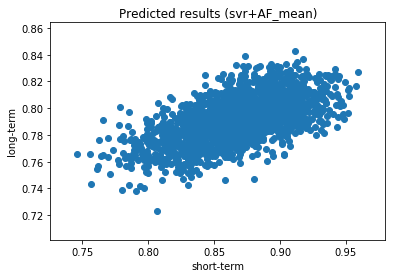

In [27]:
# visualize the prediction results
plt.figure()
plt.scatter(y_short_pred,y_long_pred,marker='o')
plt.xlabel('short-term')
plt.ylabel('long-term')
plt.title('Predicted results (svr+AF_mean)')
#plt.show()
plt.savefig('svr+AF_mean.eps')

In [28]:
# print the best score
print('Best short-term spearman score is {:.3f}'.format(A.best_score_))
A.best_params_
print('Best long-term spearman score is {:.3f}'.format(B.best_score_))
B.best_params_

Best short-term spearman score is 0.293
Best long-term spearman score is 0.130


{'pca__n_components': 0.95,
 'svr__C': 0.01,
 'svr__epsilon': 0.1,
 'svr__kernel': 'rbf'}

## Save the prediction results in submission required format

In [29]:
df_test['short-term'] = y_short_pred
df_test['long-term'] = y_long_pred
df_test['confidence_interval'] = 0 # not meaningful, this is required but not used for performance evaluation

In [30]:
df_test.head()

,video,AF_mean,AF_median,short-term,long-term,confidence_interval
0,video1.webm,"[0.69801, 0.126791, 0.560091, 0.09787, 0.52301...","[0.697488, 0.127302, 0.55834, 0.097968, 0.5209...",0.849292,0.793901,0
1,video1000.webm,"[0.644065, 0.711016, 0.596859, 0.728722, 0.397...","[0.643643, 0.711774, 0.600652, 0.730514, 0.400...",0.887082,0.776085,0
2,video1002.webm,"[0.297738, 0.316971, 0.458756, 0.305662, 0.412...","[0.30245, 0.327079, 0.452778, 0.304135, 0.4079...",0.905779,0.798296,0
3,video1008.webm,"[0.100712, 0.484618, 0.697495, 0.461341, 0.530...","[0.09765, 0.483399, 0.699809, 0.45408, 0.53140...",0.948810,0.791805,0
4,video1010.webm,"[0.519097, 0.379645, 0.217391, 0.297731, 0.147...","[0.522959, 0.400392, 0.202302, 0.309482, 0.130...",0.879850,0.780490,0


###  Requird format: videoname,[memorability score],[confidence value]
### comma seperated

In [31]:
res = df_test[['video','short-term','confidence_interval']]

In [32]:
run_name = 'me18in_TheHuskies_shortterm_run2-svr_afmean.csv'
res.to_csv(path_or_buf=run_name,sep=',',header=False,index=False)

In [33]:
res1 = df_test[['video','long-term','confidence_interval']]
run_name1 = 'me18in_TheHuskies_longterm_run2-svr_afmean.csv'
res1.to_csv(path_or_buf=run_name1,sep=',',header=False,index=False)